<a href="https://colab.research.google.com/github/lavanya5454/lavanyagit/blob/main/Simple_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SIMPLE LINEAR REGRESSION MODEL

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings (action="ignore")
import pandas as pd
Salary=pd.read_csv("/content/Salary_Data.csv")

In [ ]:
#data understanding
Salary.shape, Salary.isna().sum(), Salary.dtypes

((30, 2),
 YearsExperience    0
 Salary             0
 dtype: int64,
 YearsExperience    float64
 Salary             float64
 dtype: object)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

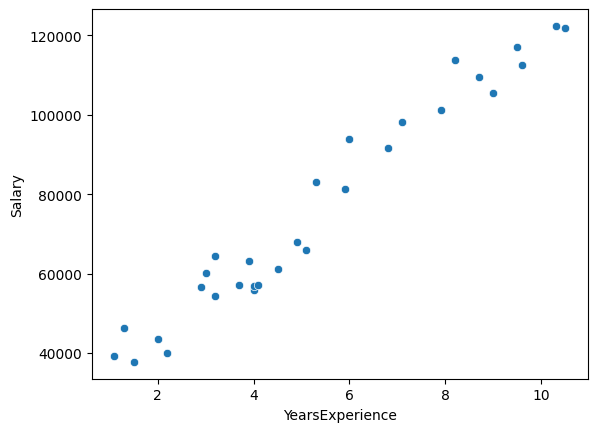

In [ ]:

#Assumption Check
##linearity Check
sns.scatterplot(x=Salary.YearsExperience,y=Salary.Salary)

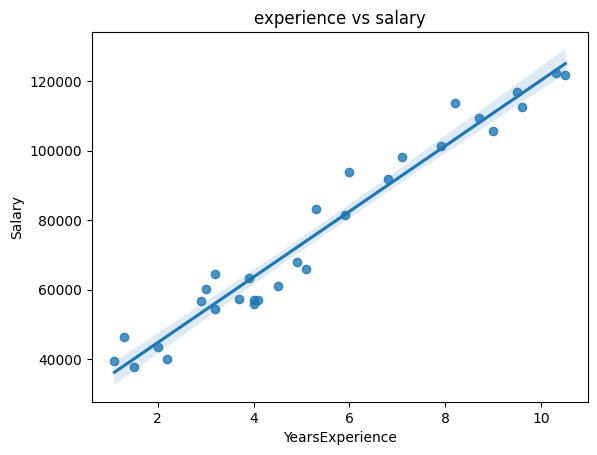

In [ ]:

#linearity check
sns.regplot(x=Salary.YearsExperience,y=Salary.Salary)
plt.title("experience vs salary")
plt.show()

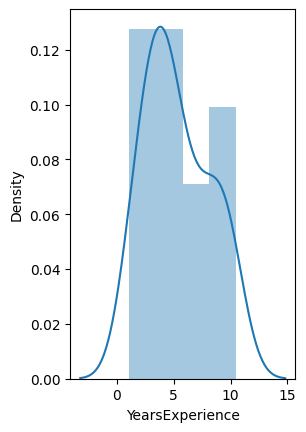

0.37956024064804106


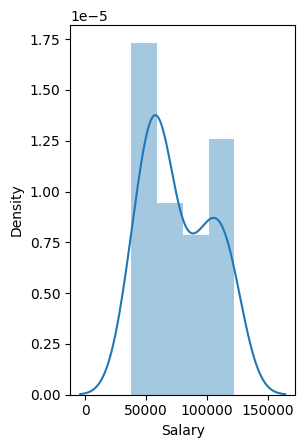

0.35411967922959153


In [ ]:

#normality check
plt.subplot(1,2,1)
sns.distplot(Salary.YearsExperience)
plt.show()
print(Salary.YearsExperience.skew())
plt.subplot(1,2,2)
sns.distplot(Salary.Salary)
plt.show()
print(Salary.Salary.skew())

In [ ]:
Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:

#data preparation
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
#model building and training
Model=smf.ols("Salary~YearsExperience",data=Salary).fit()

In [ ]:
C,M=Model.params
print ("intercept=",C)
print ("slope=",M)

intercept= 25792.20019866867
slope= 9449.962321455081


In [ ]:
Model.rsquared

0.9569566641435086

In [ ]:
Salary.max(), Salary.min()

(YearsExperience        10.5
 Salary             122391.0
 dtype: float64,
 YearsExperience        1.1
 Salary             37731.0
 dtype: float64)

In [ ]:

#model prediction
Model_pred=pd.Series([9.0,0])
New_data=pd.DataFrame(Model_pred,columns=["YearsExperience"])

In [ ]:
Model.predict(New_data)

,0
0,110841.861092
1,25792.200199


In [ ]:
# deployment
#serialization
from pickle import dump
dump(Model,open('Model','wb'))

In [ ]:

#deserialization
from pickle import load
linearfile=load(open('Model','rb'))

In [ ]:
linearfile.predict(New_data)

,0
0,110841.861092
1,25792.200199
